In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import json
import cv2
import numpy as np
from glob import glob
from typing import List, Dict 

from src.utils import open_json, read_image, seperate_teeth_to_tooth_info

teeth_img: (291, 291, 3), teeth_num: 11, decayed: False
0, 0
teeth_img: (267, 267, 3), teeth_num: 12, decayed: False
0, 1
teeth_img: (268, 268, 3), teeth_num: 13, decayed: False
0, 2
teeth_img: (306, 306, 3), teeth_num: 14, decayed: False
0, 3
teeth_img: (376, 376, 3), teeth_num: 16, decayed: False
0, 4
teeth_img: (296, 296, 3), teeth_num: 21, decayed: False
0, 5
teeth_img: (262, 262, 3), teeth_num: 22, decayed: False
0, 6
teeth_img: (282, 282, 3), teeth_num: 23, decayed: False
0, 7
teeth_img: (288, 288, 3), teeth_num: 24, decayed: False
0, 8
teeth_img: (379, 379, 3), teeth_num: 26, decayed: False
0, 9
teeth_img: (261, 261, 3), teeth_num: 11, decayed: False
1, 0
teeth_img: (211, 211, 3), teeth_num: 12, decayed: False
1, 1
teeth_img: (222, 222, 3), teeth_num: 13, decayed: False
1, 2
teeth_img: (259, 259, 3), teeth_num: 14, decayed: False
1, 3
teeth_img: (259, 259, 3), teeth_num: 15, decayed: False
1, 4
teeth_img: (334, 334, 3), teeth_num: 16, decayed: False
1, 5
teeth_img: (248, 248, 3)

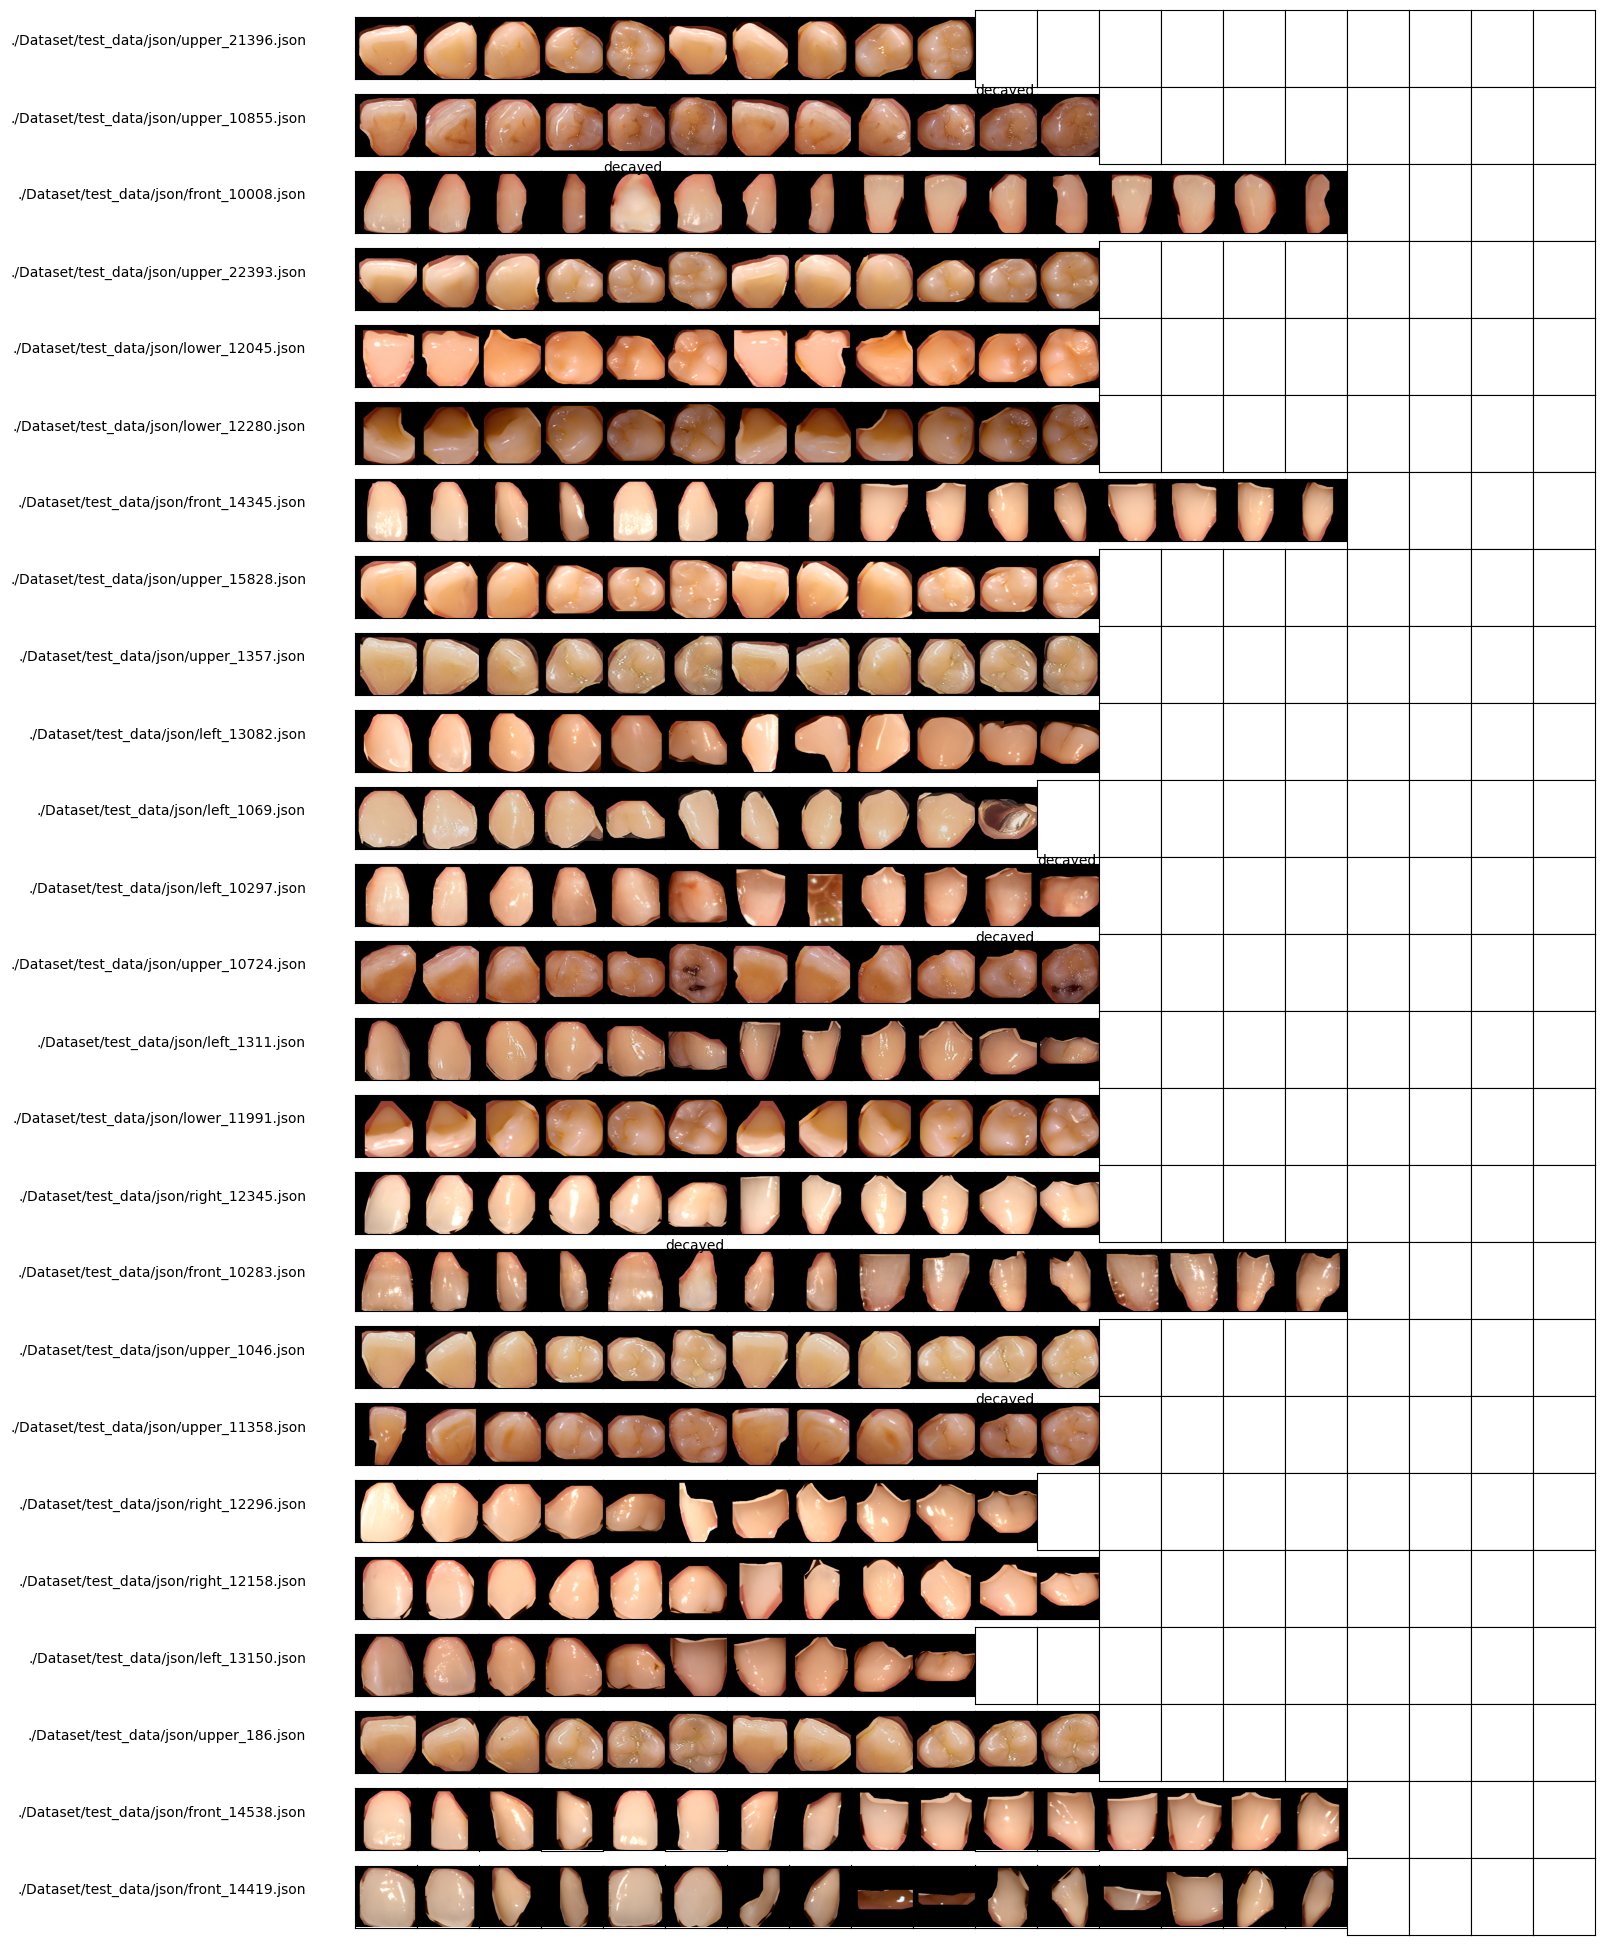

In [2]:
path = "./Dataset/test_data"
dilate_kernel_size = 21
img_padding = 10

# Set the dimensions of the grid
rows, cols = 25, 20

# Create a figure and a set of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 25))

for i in range(rows):
    for j in range(cols):
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

json_files = np.random.choice(glob(os.path.join(path, "json", "*")), 25)

# Iterate over each subplot and customize
for i, json_path in enumerate(json_files):
    teeth_dict_list = seperate_teeth_to_tooth_info(json_path, path)
    axes[i, 0].set_ylabel(f"{json_path}", fontsize=10, rotation=0, labelpad=35, ha='right')
    for j, teeth_dict in enumerate(teeth_dict_list):
        # Here you can add images or any other plot to each subplot
        # For example, axes[i, j].imshow(image) to display an image
        
        teeth_img = teeth_dict['teeth_image']
        teeth_num = teeth_dict['teeth_num']
        teeth_position = teeth_dict['teeth_position']
        decayed = teeth_dict['target']
        
        print(f"teeth_img: {teeth_img.shape}, teeth_num: {teeth_num}, decayed: {decayed}")
        print(f"{i}, {j}")
        
        if decayed:
            axes[i, j].text(0.5, 0.5, 'decayed')
        axes[i, j].imshow(teeth_img)

# Adjust the layout
fig.subplots_adjust(wspace=0, hspace=0) # Remove horizontal and vertical spacing
plt.show()

In [ ]:
with open("/zz1236zz/Dataset/sample_data/json/front_8.json", "r") as f:
    data = json.load(f)

In [ ]:
for a in data['tooth'][:]:
    print(a)

In [ ]:
glob("test_data/json/*")

In [ ]:
os.listdir("test_data/json")

In [ ]:
from glob import glob
len(glob("/zz1236zz/workspace/Dataset/train_data/json/*"))

In [1]:
from src.utils import tooth_position_to_index, tooth_num_to_index, open_json
import torch.nn.functional as F
import torch

In [4]:
for tooth_position in ("front", 'left', 'right', 'upper', 'lower'):
    tooth_position_idx = tooth_position_to_index(tooth_position)
    print(tooth_position_idx)
    tooth_position_one_hot = F.one_hot(torch.LongTensor([tooth_position_idx]), num_classes=5)
    print(tooth_position_one_hot)

0
tensor([[1, 0, 0, 0, 0]])
1
tensor([[0, 1, 0, 0, 0]])
2
tensor([[0, 0, 1, 0, 0]])
4
tensor([[0, 0, 0, 0, 1]])
3
tensor([[0, 0, 0, 1, 0]])


In [ ]:
_, teeth_info = open_json("/zz1236zz/workspace/Dataset/sample_data/json/front_8.json")

In [7]:
for tooth_num in range(11, 19):
    tooth_num_idx = tooth_num_to_index(tooth_num)
    print(tooth_num_idx)
    tooth_num_one_hot = F.one_hot(torch.LongTensor([tooth_num_idx]), num_classes=32)
    print(tooth_num_one_hot)
for tooth_num in range(21, 29):
    tooth_num_idx = tooth_num_to_index(tooth_num)
    print(tooth_num_idx)
    tooth_num_one_hot = F.one_hot(torch.LongTensor([tooth_num_idx]), num_classes=32)
    print(tooth_num_one_hot)
for tooth_num in range(31, 39):
    tooth_num_idx = tooth_num_to_index(tooth_num)
    print(tooth_num_idx)
    tooth_num_one_hot = F.one_hot(torch.LongTensor([tooth_num_idx]), num_classes=32)
    print(tooth_num_one_hot)
for tooth_num in range(41, 49):
    tooth_num_idx = tooth_num_to_index(tooth_num)
    print(tooth_num_idx)
    tooth_num_one_hot = F.one_hot(torch.LongTensor([tooth_num_idx]), num_classes=32)
    print(tooth_num_one_hot)

0
tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
1
tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
2
tensor([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
3
tensor([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
4
tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
5
tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
6
tensor([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
7
tensor([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
8
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [7]:
import torch

In [8]:
a = torch.Tensor([[1, 2, 3, 4], [1, 2, 3, 4]])
b = torch.Ten

a = torch.rand((3, 2, 4, 4))

In [17]:
a = a.view(-1, *a.shape[:])
a.shape

torch.Size([1, 24, 4])

In [18]:
a.shape[:]

SyntaxError: can't use starred expression here (3243541597.py, line 1)

In [9]:
a = a.view(-1, 4, 4)

In [15]:
a, a.shape

(tensor([[0.5573, 0.9383, 0.8270, 0.0068],
         [0.6266, 0.5186, 0.3992, 0.0553],
         [0.9121, 0.0539, 0.2528, 0.8012],
         [0.0528, 0.1130, 0.1495, 0.9526],
         [0.3762, 0.4817, 0.9362, 0.3134],
         [0.6158, 0.8319, 0.4793, 0.8200],
         [0.3450, 0.9404, 0.3351, 0.5623],
         [0.0634, 0.0269, 0.4911, 0.0194],
         [0.3833, 0.2195, 0.5373, 0.6062],
         [0.4158, 0.1446, 0.6835, 0.6280],
         [0.4539, 0.0819, 0.8485, 0.0218],
         [0.7558, 0.7292, 0.9596, 0.3700],
         [0.5573, 0.5708, 0.0993, 0.6465],
         [0.5224, 0.6696, 0.5529, 0.9011],
         [0.8323, 0.0113, 0.8345, 0.4530],
         [0.7986, 0.7317, 0.9426, 0.6183],
         [0.8507, 0.7235, 0.1118, 0.5804],
         [0.1651, 0.1491, 0.6361, 0.1707],
         [0.6633, 0.6166, 0.2875, 0.3314],
         [0.8398, 0.9751, 0.4495, 0.4189],
         [0.4784, 0.2483, 0.9846, 0.3598],
         [0.1616, 0.9584, 0.4583, 0.2167],
         [0.6472, 0.3400, 0.4342, 0.3287],
         [0

In [20]:
from src.utils import seperate_teeth_to_tooth_info
teeth_dict_list = seperate_teeth_to_tooth_info("Dataset/sample_data/json/front_18.json", "Dataset/sample_data")

In [ ]:
tooth_infos = teeth_dict_list[:4]